In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/ml3spam/spam.csv',encoding='latin1')


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/ml3spam/spam.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

0- ham
1-spam

In [ ]:
df['target'].value_counts()


target
0    4825
1     747
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

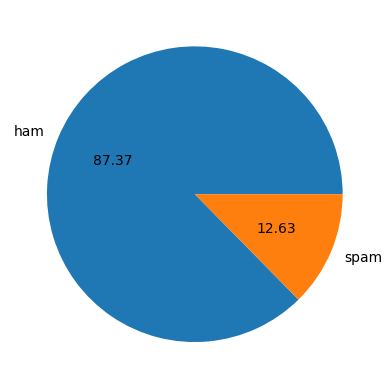

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [ ]:
df['num_charecter']=df['text'].apply(len)

In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_charecter,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_charecter', ylabel='Count'>

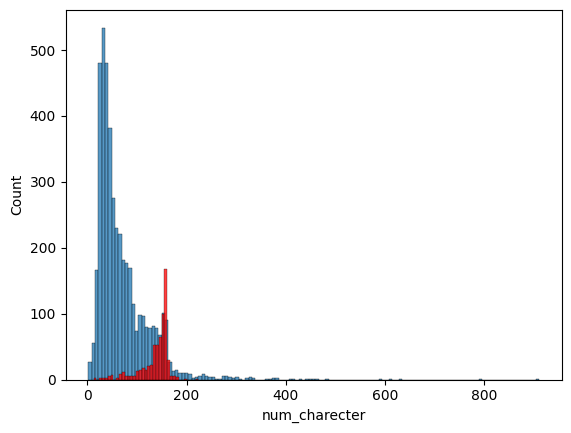

In [ ]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_charecter'])
sns.histplot(df[df['target']==1]['num_charecter'],color='red')

here we can see most of the ham  messages has less charecters than spam message. same thing goes around for number of words and sentences to.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

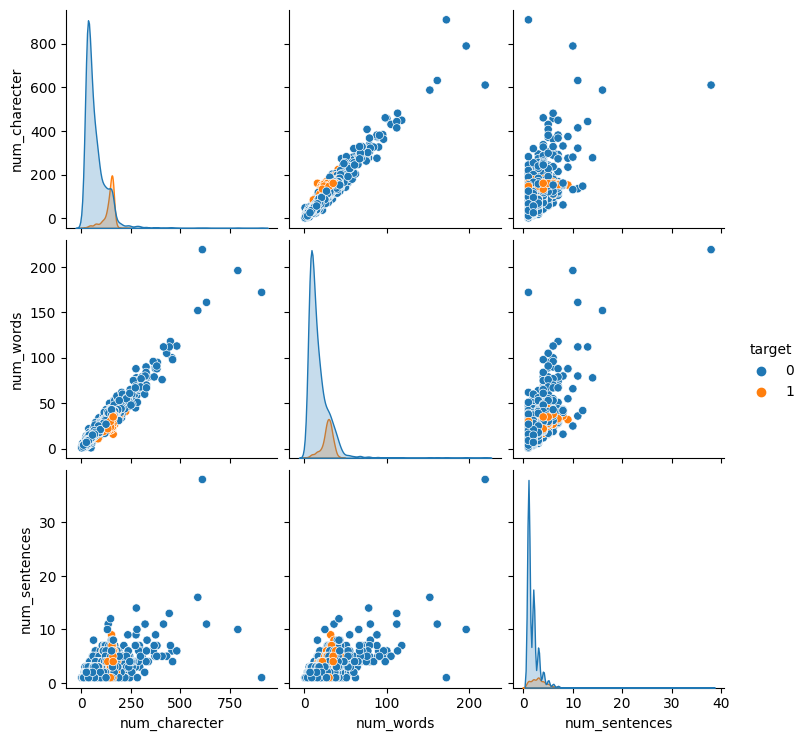

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
from nltk.corpus import stopwords
import string


now we gonna remove special charecters,tokenize,change text ti lower case,remove stopwords,stemming


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

def transf(text):
    ps = PorterStemmer()  
    text = text.lower()  
    tokens = nltk.word_tokenize(text)  
    tokens = [token for token in tokens if token.isalnum()]
    
    filtered_tokens = [
        token for token in tokens 
        if token not in stopwords.words('english') and token not in string.punctuation
    ]

    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    
    return " ".join(stemmed_tokens)



In [ ]:
df['trasnformed_text']=df['text'].apply(transf)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['trasnformed_text'].str.cat(sep=" "))

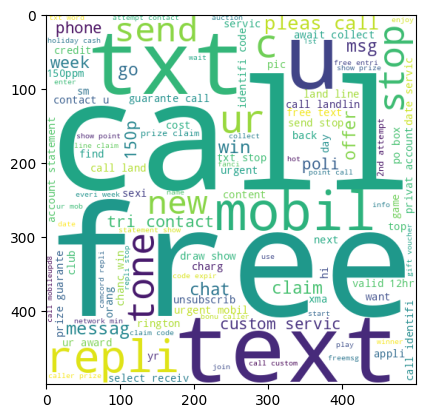

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['trasnformed_text'].str.cat(sep=" "))

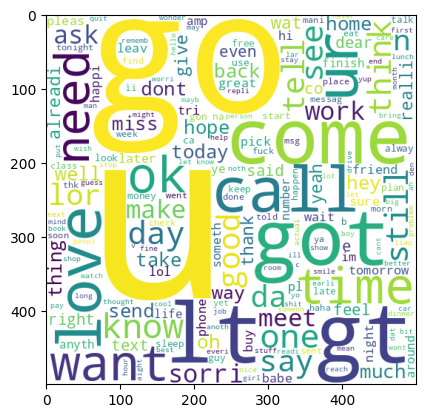

In [ ]:
plt.imshow(ham_wc)

now we take out top 30 words formboth spam and ham

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['trasnformed_text'].tolist():
        for word in msg.split():
            spam_corpus.append(word)

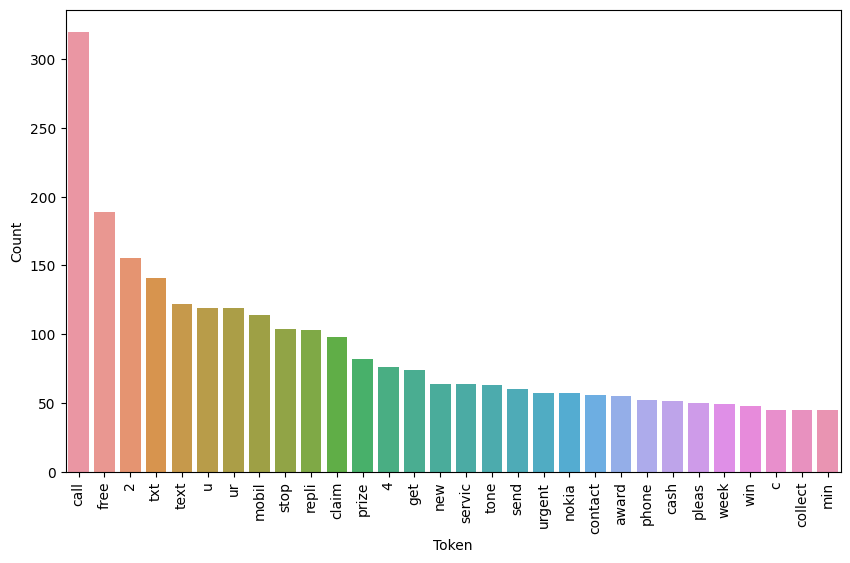

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

most_common_tokens = Counter(spam_corpus).most_common(30)
df_most_common = pd.DataFrame(most_common_tokens, columns=['Token', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Token', y='Count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['trasnformed_text'].tolist():
        for word in msg.split():
            ham_corpus.append(word)

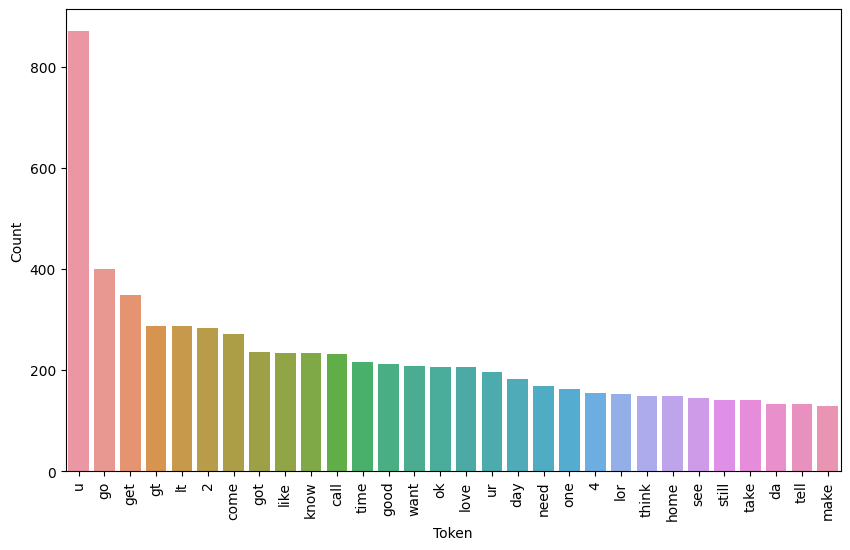

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

most_common_tokens = Counter(ham_corpus).most_common(30)
df_most_common = pd.DataFrame(most_common_tokens, columns=['Token', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Token', y='Count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()


Naive bayes model


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x = cv.fit_transform(df['trasnformed_text']).toarray()

In [ ]:
x.shape

(5169, 6629)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb=MultinomialNB()
bnb= BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.5175438596491229
[[786 110]
 [ 20 118]]


In [ ]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.84
[[872  24]
 [ 12 126]]


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9736842105263158
[[893   3]
 [ 27 111]]


bernaull has best precision_score,so we'll take it. or we use tfidf instad of countvectorization, we can choose multinomial as it will be having better precision score. but i will go with bernaulli here. we may also use knn,decisointree,randomforest etc for this instead of naive bayes and can calculate best algorithm by merge comparing all these models with naive bayes.

now we just need to pickle these model up as website or something and use.
the process goes like this, when ever u receive a new email, it 1st preprocess the mail, then vectorize and finally apply the algorithm to classify.

In [ ]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))

In [ ]:
import streamlit as st

cv = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

def transf(text):
    ps = PorterStemmer()  
    text = text.lower()  
    tokens = nltk.word_tokenize(text)  
    tokens = [token for token in tokens if token.isalnum()]
    
    filtered_tokens = [
        token for token in tokens 
        if token not in stopwords.words('english') and token not in string.punctuation
    ]

    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    
    return " ".join(stemmed_tokens

st.title('SMS CLASSIFIER')
input_sms=st.text_input('Add sms')
if st.button('Predict'):
    #preprocess
    transformed_sms = transf(input_sms)
    #vectorize
    vector_input=cv.fit_transform([transformed_sms])
    #predict
    result = model.predict(vector_input)[0]
    #display
    if result == 1:
                    st.write('Spam')
    else:
                    st.write('Not Spam')
